In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
cuarto2014 = pd.read_excel("data/2014/simce4b2014_rbd_publica_final.xlsx")
columnas = ['nom_rbd','prom_lect4b_rbd','prom_mate4b_rbd','agno']
cuarto2014 = cuarto2014[columnas]

In [3]:
sexto2016 = pd.read_excel("data/2016/simce6b2016_rbd_publica_final.xlsx")
columnas = ['nom_rbd','prom_lect6b_rbd','prom_mate6b_rbd','agno']
sexto2016 = sexto2016[columnas]

In [4]:
octavo2019 = pd.read_excel('data/2019/simce8b2019_rbd.xlsx')
columnas = ['nom_rbd','prom_lect8b_rbd','prom_mate8b_rbd','agno']
octavo2019 = octavo2019[columnas]

In [5]:
segundo2022 = pd.read_excel("data/2022/Simce2m2022_rbd_final.xlsx")
columnas = ['nom_rbd','prom_lect2m_rbd','prom_mate2m_rbd',"agno"]
segundo2022 = segundo2022[columnas]

In [6]:
dfs = [segundo2022, cuarto2014, sexto2016, octavo2019]

for df in range(len(dfs)):
    num = (df+1)*2
    
    columnas = [f"prom_lect{num}m_rbd", f"prom_mate{num}m_rbd"]

    if df > 0:
        columnas = [f"prom_lect{num}b_rbd", f"prom_mate{num}b_rbd"]


    obj = dfs[df]
    obj["prom_ptjs"] = obj[columnas].mean(axis=1)

    obj.rename(columns={columnas[1]: "prom_mate", columnas[0]: "prom_lect"}, inplace=True)

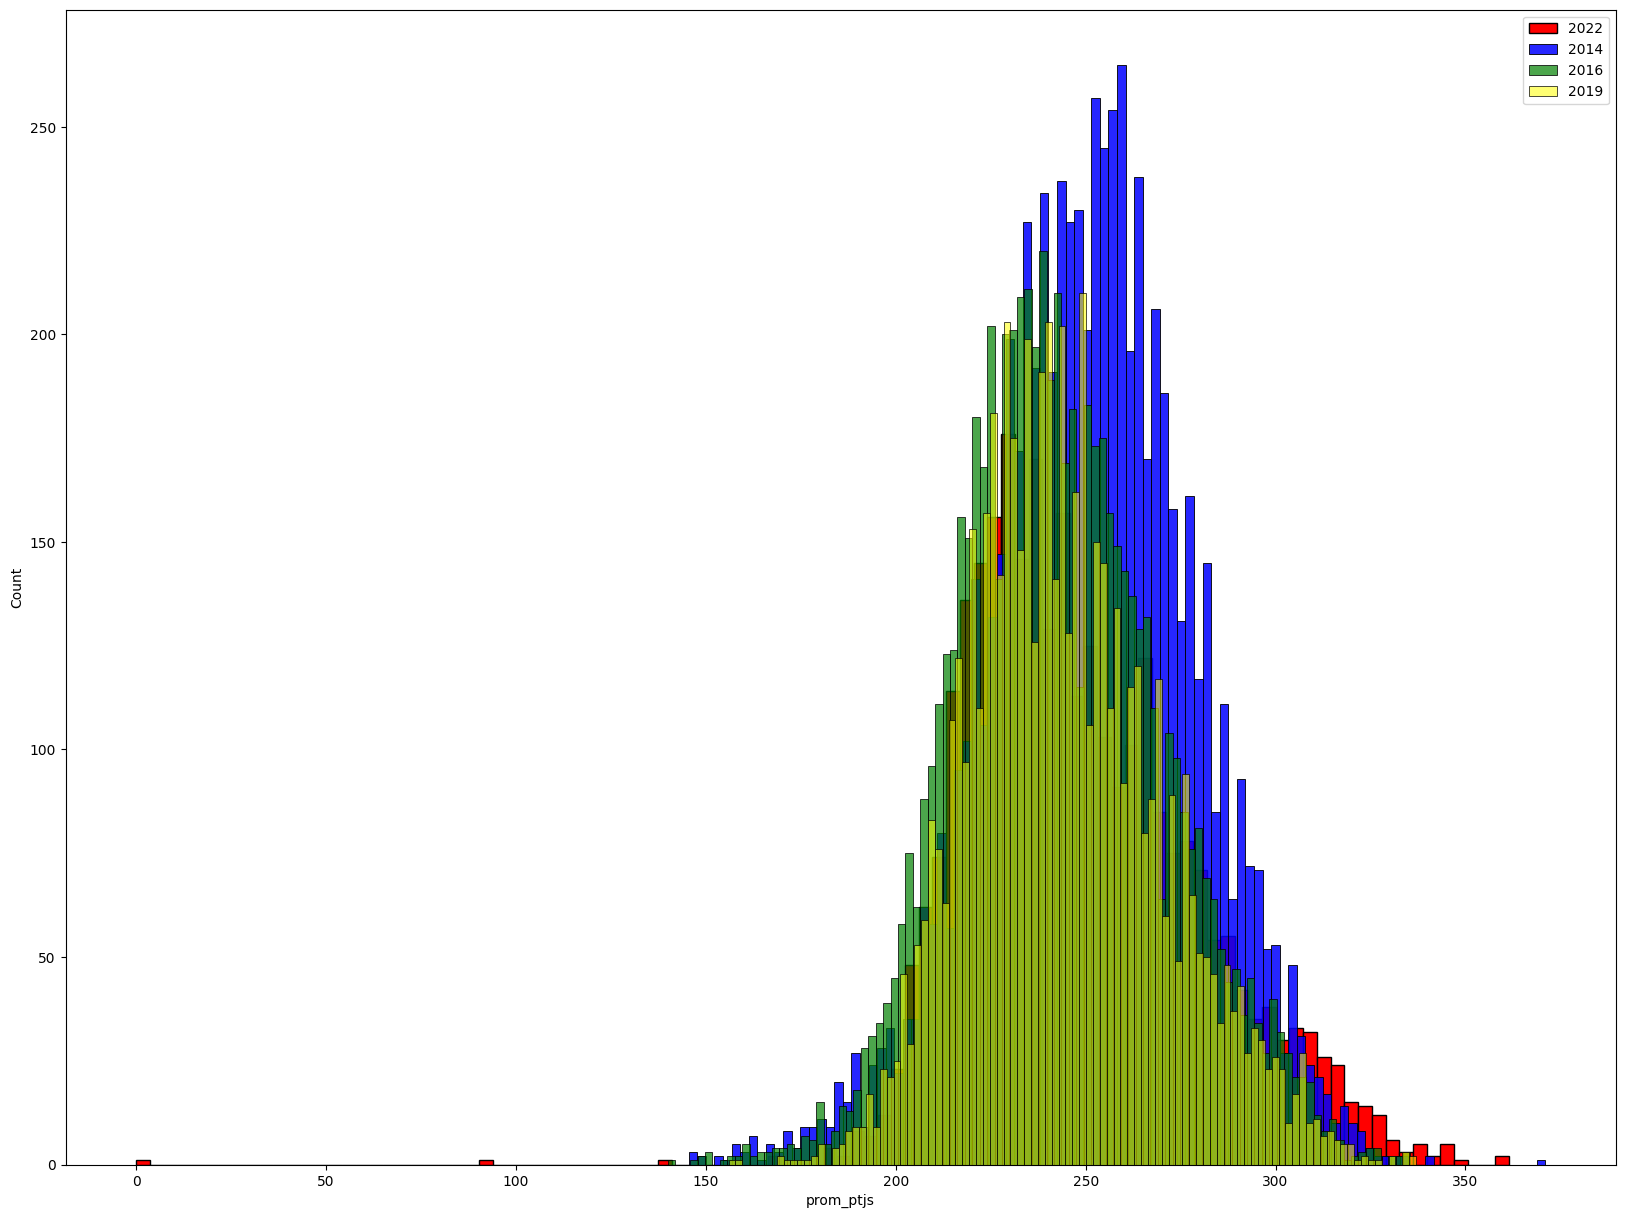

In [7]:
plt.figure(figsize=(20,15))
colors = ("red","blue","green","yellow")

alpha = 1
contador = 0
for df in dfs:
    sns.histplot(data=df, x="prom_ptjs", label=df["agno"][0], color=colors[contador], alpha=alpha, fill=True, bins=100)
    contador += 1
    alpha -= 0.15
plt.legend();

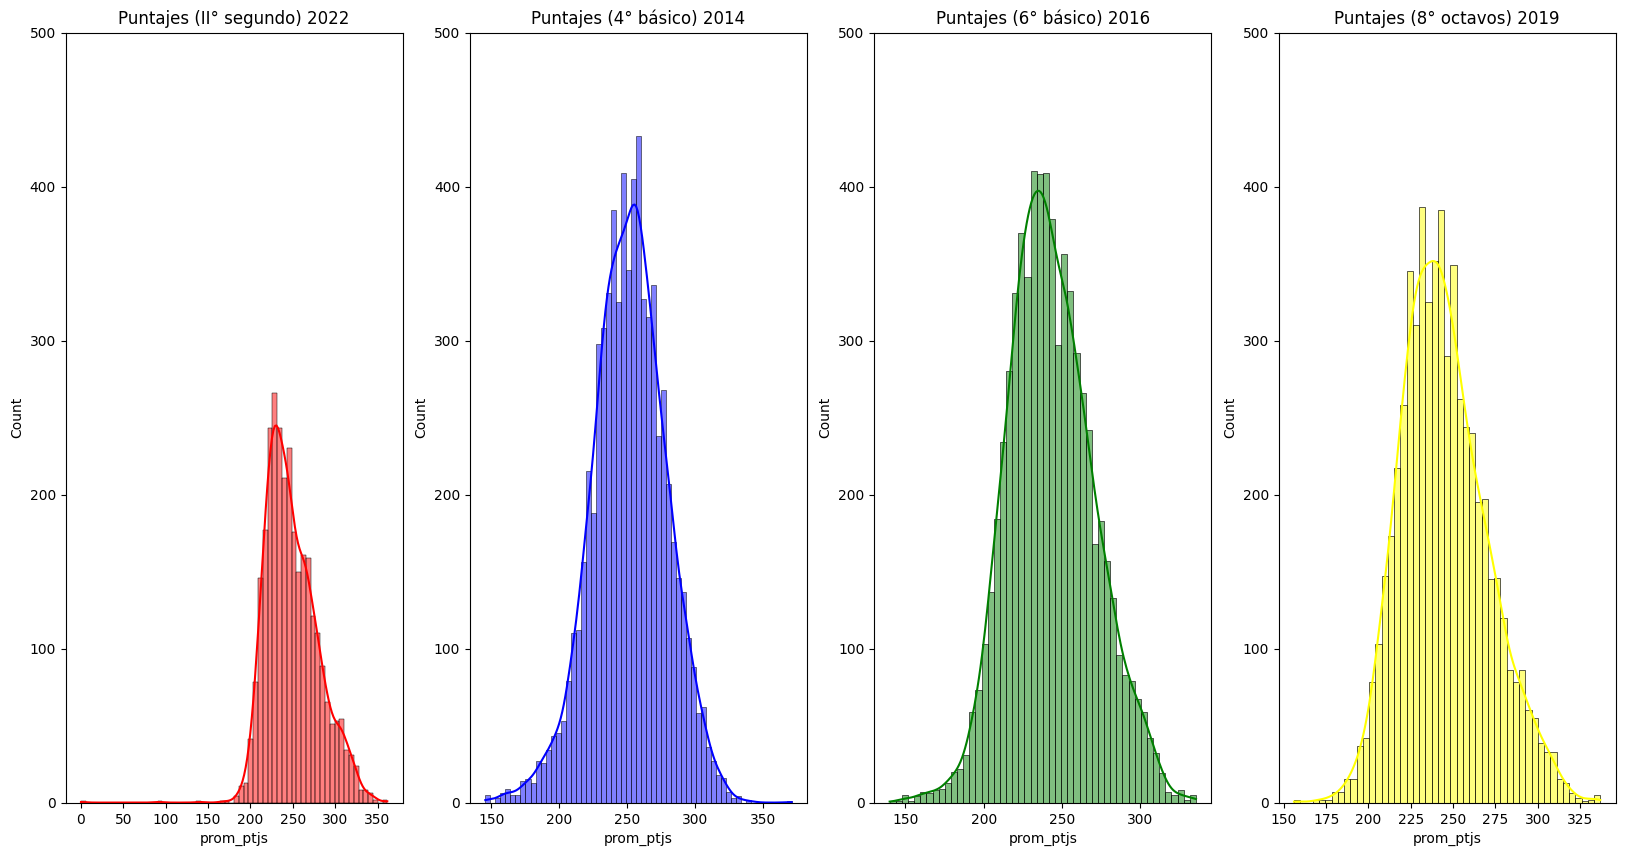

In [8]:
fig, ax = plt.subplots(1,len(dfs), figsize=(20,10))
titles = ("Puntajes (II° segundo) 2022","Puntajes (4° básico) 2014","Puntajes (6° básico) 2016","Puntajes (8° octavos) 2019")
for df in range(len(dfs)):
    sns.histplot(data=dfs[df], x="prom_ptjs", ax=ax[df], color=colors[df], kde=True)
    ax[df].set_title(titles[df])
    ax[df].set_ylim(0,500)

In [9]:
df_consolidado = pd.concat([cuarto2014, sexto2016, octavo2019, segundo2022], ignore_index=True)

df_medias = df_consolidado.groupby("agno")[["prom_mate","prom_lect"]].mean().reset_index()

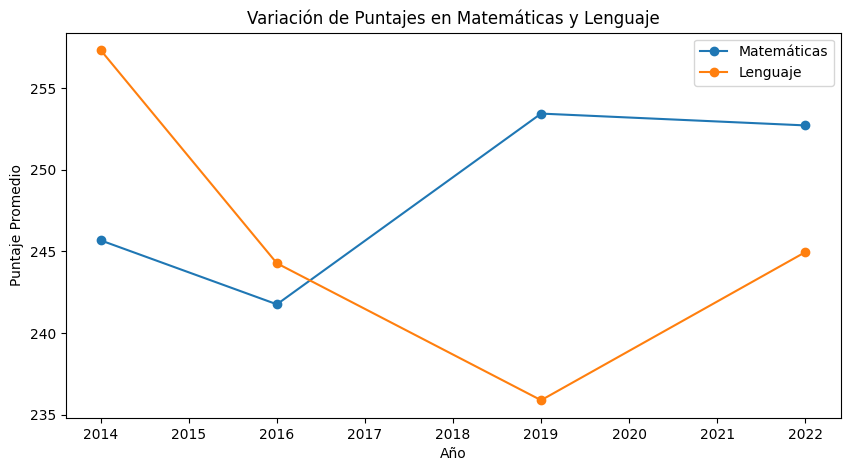

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_medias['agno'], df_medias['prom_mate'], marker='o', label='Matemáticas')
plt.plot(df_medias['agno'], df_medias['prom_lect'], marker='o', label='Lenguaje')

plt.xlabel('Año')
plt.ylabel('Puntaje Promedio')
plt.title('Variación de Puntajes en Matemáticas y Lenguaje')
plt.legend()
plt.show()


### Conclusión

Se llega apreciar que los resultados en promedio tienden a mantenerse en el tiempo en la generación vigente; excepto cuando llegamos a ños como el 2022 que fue un año justo post-pandemia en donde se logra apreciar una abrupta disminución en los resultados promedios del SIMCE.

Ahora evaluando caso por caso (puntajes de matematicas y lectura para ser exactos), estos en la prueba de "lectura" tienden a bajar llegados a 2019 y a subir ampliamente en "matematicas".